# Exercises in statistics

In [65]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

## Exercise 3

Load in the data "energySoftware.csv" and answer the following questions:
1. Plot the distribution of CPU for each test type
2. Is there a difference in the CPU between bubblesort and bubblesort_ll? (note that the last name contains two small l's and not two capital i's) Justify your choice of test(s). 
3. Is there a difference in the CPU between bubblesort_func and bubblesort_ll2? Justify your choice of test(s). If there is a difference, how big is it?
4. When it comes to time, is there a difference between bubblesort and bubblesort_ll? Justify your choice of test(s).
5. Perform an ANOVA test to test if there is a difference in means across groups for CPU
6. Perform an ANOVA test to test if there is a difference in means across groups for time

In [66]:
df = fb = pd.read_csv('energySoftware.csv')

In [67]:
df

,test,PKG,CPU,nn,nn2,time
0,bubblesort,0.010986,0.009155,,,3.165
1,bubblesort,0.013184,0.010925,,,3.069
2,bubblesort,0.015198,0.009399,,,2.617
3,bubblesort,0.010559,0.009583,,,2.572
4,bubblesort,0.009949,0.009949,,,2.671
...,...,...,...,...,...,...
1436,bubblesort_ll,0.013184,0.014038,,,2.394
1437,bubblesort_ll,0.021362,0.014343,,,2.428
1438,bubblesort_ll,0.013672,0.014221,,,2.479
1439,bubblesort_ll,0.019531,0.014526,,,2.537


In [68]:
df.describe()

,PKG,CPU,time
count,1441.000000,1441.000000,1441.000000
mean,0.017618,0.015021,3.009384
std,0.004464,0.003192,0.571439
min,0.008179,0.007812,1.962000
25%,0.013733,0.012939,2.462000
50%,0.017761,0.015747,3.363000
75%,0.020874,0.017822,3.524000
max,0.026794,0.020325,4.244000


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   test    1441 non-null   object 
 1   PKG     1441 non-null   float64
 2   CPU     1441 non-null   float64
 3   nn      1441 non-null   object 
 4   nn2     1441 non-null   object 
 5   time    1441 non-null   float64
dtypes: float64(3), object(3)
memory usage: 67.7+ KB


In [70]:
df["test"].value_counts()

test
bubblesort         361
bubblesort_func    360
bubblesort_ll2     360
bubblesort_ll      360
Name: count, dtype: int64

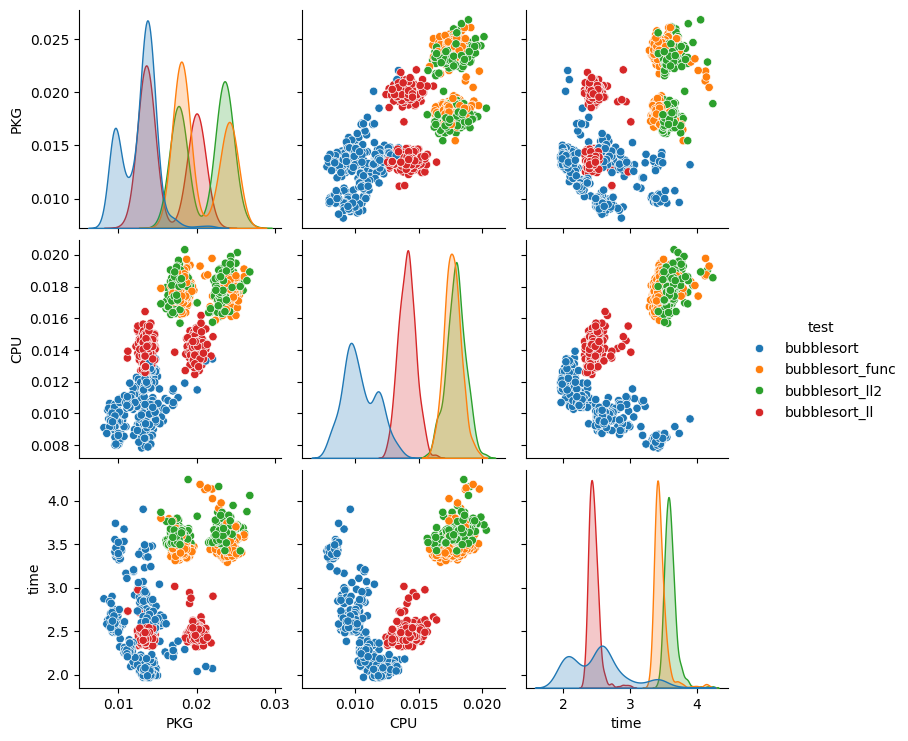

In [71]:
sns.pairplot(df, hue="test")

### 1. Plot the distribution of CPU for each test type

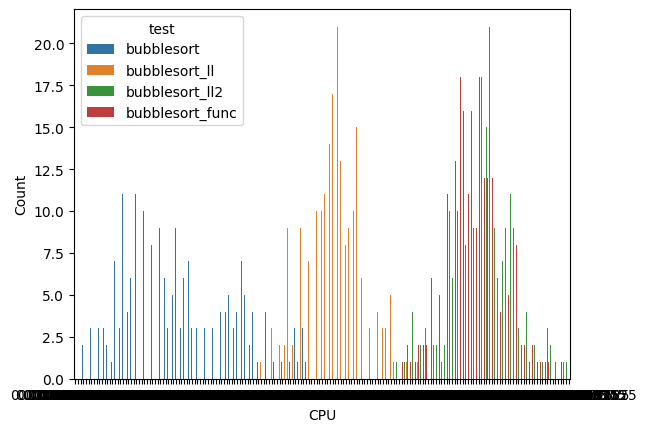

In [72]:
sns.countplot(df, x="CPU", hue="test")
plt.xlabel("CPU")
plt.ylabel("Count")
plt.show()

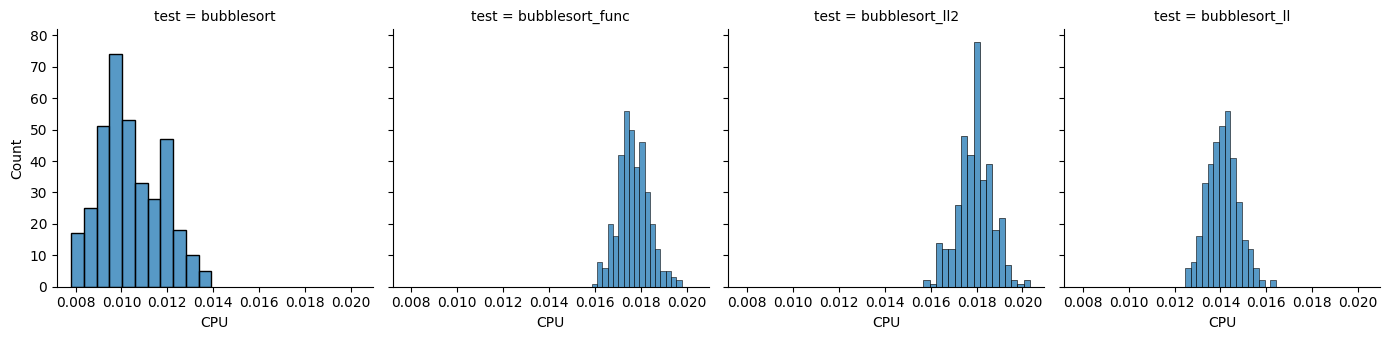

In [73]:
g=sns.FacetGrid(df, col="test", height=3.5)
g.map(sns.histplot, "CPU")

### 2. Is there a difference in the CPU between bubblesort and bubblesort_ll? (note that the last name contains two small l's and not two capital i's) Justify your choice of test(s). 

### Hypothesis, acceptable p-value less than 0.05    

Given the data is numeric, is normally distributed as seen in the graph above, and that the sample size is greater than 30(medium, see above), data is not paired, the best suitable option is Student t-test to test our hypothesis

In [74]:
bubblesort_CPU = df[df["test"]=="bubblesort"]["CPU"]
bubblesort_ll_CPU = df[df["test"]=="bubblesort_ll"]["CPU"]
bubblesort_func_CPU = df[df["test"]=="bubblesort_func"]["CPU"]
bubblesort_ll2_CPU = df[df["test"]=="bubblesort_ll2"]["CPU"]

bubblesort_time = df[df["test"]=="bubblesort"]["time"]
bubblesort_func_time = df[df["test"]=="bubblesort_func"]["time"]
bubblesort_ll_time = df[df["test"]=="bubblesort_ll"]["time"]
bubblesort_ll2_time = df[df["test"]=="bubblesort_ll2"]["time"]

In [75]:
print(stats.ttest_ind(bubblesort_CPU.head(20), bubblesort_ll_CPU.head(20))) # ttest_ind is a variant of student t-test
print(stats.ttest_ind(bubblesort_CPU, bubblesort_ll_CPU))

TtestResult(statistic=np.float64(-19.7429499074299), pvalue=np.float64(1.415663216996009e-21), df=np.float64(38.0))
TtestResult(statistic=np.float64(-47.4605163039462), pvalue=np.float64(9.831404686370246e-224), df=np.float64(719.0))


    Given the pvalue=9.831404686370246e-224, which is much lower than the significance level we have chosen of 0.05 for p
    we can then reject the null hypothesis and declare that there is a significant difference in the CPU between bubblesort and bubblesort_ll

### 3. Is there a difference in the CPU between bubblesort_func and bubblesort_ll2? Justify your choice of test(s). If there is a difference, how big is it?

### Hypothesis, acceptable p-value less than 0.05

Given the data, CPU, is numeric, is normally distributed as seen in the graph above, and that the smaple size is greater than 30(medium, see above), data is not paired, the best suitable option is Student t-test to test our hypothesis.

Same as the scenario above!

In [76]:
print(stats.ttest_ind(bubblesort_func_CPU.head(20), bubblesort_ll2_CPU.head(20)))
print(stats.ttest_ind(bubblesort_func_CPU, bubblesort_ll2_CPU))

TtestResult(statistic=np.float64(-1.460198280525312), pvalue=np.float64(0.15245454046335788), df=np.float64(38.0))
TtestResult(statistic=np.float64(-4.692273179928857), pvalue=np.float64(3.2355729348933066e-06), df=np.float64(718.0))


    Given the pvalue=3.2355729348933066e-06, which is much lower than the significance level we have chosen of 0.05 for p
    we can then reject the null hypothesis and declare that there is a significant difference in the CPU between bubblesort_func and bubblesort_ll2

In [83]:
print("bubblesort_func CPU mean: ", bubblesort_func_CPU.mean())
print("bubblesort_ll2 CPU mean:  ", bubblesort_ll2_CPU.mean()) 

bubblesort_func CPU mean:  0.01766899956597222
bubblesort_ll2 CPU mean:   0.017919074164496528


    There is a difference of about 0.03 CPU, quite small

### 4. When it comes to time, is there a difference between bubblesort and bubblesort_ll? Justify your choice of test(s).

### Hypothesis, acceptable p-value less than 0.05

Given the data, time, is numeric, is normally distributed as seen in the graph above, and that the smaple size is greater than 30(medium, see above), data is not paired, the best suitable option is Student t-test to test our hypothesis.

Same as the scenario above!

In [78]:
print(stats.ttest_ind(bubblesort_time.head(20), bubblesort_ll_time.head(20)))
print(stats.ttest_ind(bubblesort_time, bubblesort_ll_time))

TtestResult(statistic=np.float64(4.200705061924748), pvalue=np.float64(0.0001549839517515672), df=np.float64(38.0))
TtestResult(statistic=np.float64(2.6869646116756063), pvalue=np.float64(0.007377079277349758), df=np.float64(719.0))


    Given the pvalue=0.007377079277349758, which is lower than the significance level we have chosen of 0.05 for p
    we can then reject the null hypothesis and declare that there is a significant difference in the time between bubblesort and bubblesort_ll

### 5. Perform an ANOVA test to test if there is a difference in means across groups for CPU

In [ ]:
stats.f_oneway(bubblesort_CPU, bubblesort_ll_CPU, bubblesort_func_CPU, bubblesort_ll2_CPU) # f_statistics of 5641 is very large, indicating a difference between the groups

F_onewayResult(statistic=np.float64(5641.937696029289), pvalue=np.float64(0.0))

f_statistics of 5641 is very large, indicating a difference between the groups, With a p-value of 0, ensures that it did not get a high score by chance, but does not say on which function

In [80]:
df.groupby("test")["CPU"].describe() # ANOVA, Analysis of Variance, can be done one more that 2 groups

,count,mean,std,min,25%,50%,75%,max
test,,,,,,,,
bubblesort,361.0,0.010412,0.001316,0.007812,0.009460,0.010132,0.011597,0.013916
bubblesort_func,360.0,0.017669,0.000663,0.015869,0.017212,0.017639,0.018066,0.019775
bubblesort_ll,360.0,0.014097,0.000662,0.012451,0.013611,0.014099,0.014526,0.016418
bubblesort_ll2,360.0,0.017919,0.000763,0.015686,0.017456,0.017944,0.018433,0.020325


    The test has a pvalue=0.0 which mean that there is a difference in the means across the groups for CPU
    As well as the table above show a difference in mean and more!

### 6. Perform an ANOVA test to test if there is a difference in means across groups for time

In [ ]:
stats.f_oneway(bubblesort_time, bubblesort_ll_time, bubblesort_func_time, bubblesort_ll2_time) #  f_statistics, if high provides evidence against the null hypothesis, it states that all group means are equal

F_onewayResult(statistic=np.float64(2556.3329354127823), pvalue=np.float64(0.0))

f_statistics of 5641 is very large, indicating a difference between the groups, With a p-value of 0, ensures that it did not get a high score by chance, but does not say on which function

In [82]:
df.groupby("test")["time"].describe()

,count,mean,std,min,25%,50%,75%,max
test,,,,,,,,
bubblesort,361.0,2.518892,0.419260,1.962,2.146,2.5410,2.67600,3.902
bubblesort_func,360.0,3.456836,0.115992,3.292,3.395,3.4285,3.48400,4.188
bubblesort_ll,360.0,2.458178,0.089711,2.320,2.405,2.4430,2.49100,3.014
bubblesort_ll2,360.0,3.604994,0.094482,3.423,3.546,3.5905,3.64375,4.244


    The test has a pvalue= 0.0 which mean that there is a difference in the means across the groups for time
    As well as the table above show a difference in mean and more!